In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

# print(np.__version__)
# print(pd.__version__)
# print(mpl.__version__)

# 解决中文乱码问题
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"]=False # 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
%matplotlib inline  
# 排除警告
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'time_series.csv')
print(data.head(3))

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  \
0        0        0        0  ...    30967    31238    31517   31836   32022   
1        0        0        0  ...     2402     2466     2535    2580    2662   
2        0        0        0  ...    13273    13571    13907   14272   14657   

   7/3/20  7/4/20  7/5/20  7/6/20  7/7/20  
0   32324   32672   32951   33190   33384  
1    2752    2819    2893    2964    3038  
2   15070   15500   15941   16404   16879  

[3 rows x 172 columns]


In [4]:
# 取美国数据
US_data = data[ data['Country/Region'] == "US" ]
print(US_data)

    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
225            NaN             US  37.0902 -95.7129        1        1   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/28/20  6/29/20  6/30/20  \
225        2        2        5        5  ...  2549294  2590668  2636414   

      7/1/20   7/2/20   7/3/20   7/4/20   7/5/20   7/6/20   7/7/20  
225  2687588  2742049  2795361  2841241  2891124  2936077  2996098  

[1 rows x 172 columns]


In [8]:
# 取最近14天美国的数据-需要先进行转置，因为列无法使用切片，只有行才可以使用切片
US_data_T = US_data.T # .T 转置操作
print(US_data_T)
print(US_data_T[-14:])
print(US_data_T[-14:].T) # 再次转置获得行数据，这是一个DataFrame格式的数据

                    225
Province/State      NaN
Country/Region       US
Lat             37.0902
Long           -95.7129
1/22/20               1
...                 ...
7/3/20          2795361
7/4/20          2841241
7/5/20          2891124
7/6/20          2936077
7/7/20          2996098

[172 rows x 1 columns]
             225
6/24/20  2382426
6/25/20  2422299
6/26/20  2467554
6/27/20  2510259
6/28/20  2549294
6/29/20  2590668
6/30/20  2636414
7/1/20   2687588
7/2/20   2742049
7/3/20   2795361
7/4/20   2841241
7/5/20   2891124
7/6/20   2936077
7/7/20   2996098
     6/24/20  6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20   7/1/20  \
225  2382426  2422299  2467554  2510259  2549294  2590668  2636414  2687588   

      7/2/20   7/3/20   7/4/20   7/5/20   7/6/20   7/7/20  
225  2742049  2795361  2841241  2891124  2936077  2996098  


In [16]:
result = US_data_T[-14:].T  
print(result.columns.tolist()) #可以通过columns方法取出表头，然后tolist，转为列表
print(result.values.tolist()[0]) #可以通过columns方法取出二维数组的值，然后tolist，转为列表

['6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20', '7/6/20', '7/7/20']
[2382426, 2422299, 2467554, 2510259, 2549294, 2590668, 2636414, 2687588, 2742049, 2795361, 2841241, 2891124, 2936077, 2996098]


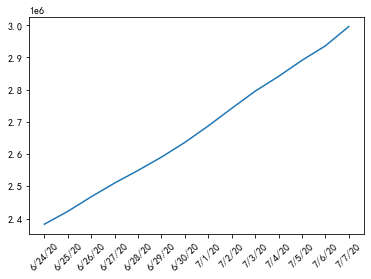

In [18]:
x = result.columns.tolist()
y = result.values.tolist()[0]

plt.plot(range(len(x)),y)
plt.xticks(range(len(x)),x,rotation=45)
plt.show()